Name: Paola Granados

Labpartner(s): Luz Ballesteros

In [2]:
#import statements go here
import pandas as pd 
import numpy as np

# Class 12.2

# Warmups 11.2

**W.1.** In the scipy lecture notes on statistics go through **Section 3.1.2 Hypothesis testing: comparing two groups** tutorial. Make sure to read up about t-tests and the rest if you are not familiar with these statistical methods.
https://scipy-lectures.org/packages/statistics/index.html#id13

Note you will need to load in the dataset on brains at the beginning of the section

It is suggested you do the rest of the 3.1 section for practice this week. Most of it is review, some of it is new and useful for you all.

In [3]:
#import stats
from scipy import stats

In [4]:
#import data to use 
data = pd.read_csv('brain_size.csv',sep=';', na_values=".")

In [5]:
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


In [6]:
#1 sample t-test: testing the value of a population mean 
stats.ttest_1samp(data["VIQ"],0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

SInce p-value is very very very small, we can claim that the population mean for the IQ (VIQ) is not 0 

In [7]:
#subset for viq based on gender

female_viq = data[data["Gender"]=="Female"]["VIQ"]
male_viq = data[data["Gender"] == "Male"]["VIQ"]

In [8]:
# 2 sample t-test: testing for difference across populations 

stats.ttest_ind(female_viq,male_viq)

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

##### Paired Tests: repeated measurements on the same individuals 

In [9]:
#2 sample test

#this approach forgets there are links between observations
#theyre based on the same people
stats.ttest_ind(data["FSIQ"],data["PIQ"])

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

In [10]:
# Paired test 

stats.ttest_rel(data["FSIQ"],data["PIQ"])

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

p-value changed between 2 sample and paired test 

In [11]:
#1 sample test on the difference 

stats.ttest_1samp(data["FSIQ"],data["PIQ"],0)

Ttest_1sampResult(statistic=0     -2.770694
1     -2.770694
2     -9.598946
3     -3.821195
4     -5.396945
5      0.906056
6     -4.609070
7      4.057557
8      7.734308
9     -8.811071
10    -2.770694
11    -3.821195
12    -2.770694
13    -8.811071
14     6.158558
15     4.582807
16    -1.720194
17     3.007057
18     7.734308
19     7.209058
20     7.209058
21     7.734308
22    -5.396945
23    -3.821195
24     3.007057
25    -4.609070
26     7.734308
27     0.906056
28    10.885809
29    -2.770694
30    -4.871695
31    -6.184820
32     0.906056
33     7.209058
34     8.522183
35    -3.821195
36    -2.770694
37     5.108057
38    10.360558
39     6.421183
Name: PIQ, dtype: float64, pvalue=array([8.52474809e-03, 8.52474809e-03, 8.05059685e-12, 4.65544360e-04,
       3.55586659e-06, 3.70469981e-01, 4.26342429e-05, 2.30469048e-04,
       2.14925069e-09, 8.11771137e-11, 8.52474809e-03, 4.65544360e-04,
       8.52474809e-03, 8.11771137e-11, 3.11895353e-07, 4.62578121e-05,
       9.33242

In [12]:
#T tests assume gaussian errors
#WILCOXON SIGNED RANK TEST

stats.wilcoxon(data["FSIQ"],data["PIQ"])

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

#### Exercise: difference between males and females

In [249]:
#subset for viq based on gender
data = data.dropna(subset = ["Weight"])
female_weight = data[data["Gender"]=="Female"]["Weight"]
male_weight = data[data["Gender"] == "Male"]["Weight"]

In [252]:
male_weight.shape

(18,)

In [253]:
# 2 sample t test 

stats.ttest_ind(female_weight, male_weight)

Ttest_indResult(statistic=-4.870950921940696, pvalue=2.227293018362118e-05)

# Lecture 12.2

### Agenda:


Some useful things to do with a timeseries
- datetime objects
- moving averages
- detrending

#### Datetime Objects in python and pandas

Python has a wonderful feature called datetime objects. These are super-useful if you are dealing with any data that has a timestamp. They are a bit tricky to get used to, but worth the effort, and the alternatives are usually much more painful (trust me on this one). 

Documentation: 
- https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
- https://docs.python.org/3/library/datetime.html

There is a lot you can do with these. Here we will just cover the basics. Dig in to the documentation if you need something specfic.

Note that Victoria used these in her sample code to make movie frames for HYCOM data: https://github.com/chsharrison/IntroSciComp_S2021/blob/main/Class_materials/Hycom-CartopyDemo%20-%20updated.ipynb

In [13]:
from datetime import datetime, timedelta
import pandas as pd

#### Defining a specfic date

In [14]:
date1 = datetime(1996,1,1) 

In [15]:
# this is a datetime object
date1

datetime.datetime(1996, 1, 1, 0, 0)

In [16]:
# print out the date
print(date1)

1996-01-01 00:00:00


In [17]:
# you can also format the date as a string however you like (useful for plots)
date1.strftime("%m-%d-%Y")

'01-01-1996'

In [18]:
# defining a date with hours, minutes and seconds
date2 = datetime(1996,1,1, 13, 34, 6) # note using 24 clock (miltary time) here

In [19]:
print(date2)

1996-01-01 13:34:06


In [20]:
#what is going to happen here?
date2.strftime("%m-%d-%Y")

'01-01-1996'

In [21]:
date1.today() #somehow it knows what timezone I am (probably from my computer)

datetime.datetime(2021, 4, 10, 16, 19, 0, 932769)

#### If we want to increment the date we can use timedelta

In [22]:
#add a day
date1 = date1 + timedelta(days=1)
print(date1)


1996-01-02 00:00:00


In [23]:
date1 = date1 + timedelta(minutes = 2, seconds=1)
print(date1)

1996-01-02 00:02:01


In [24]:
# you can also do things like add fractional days
date1 = date1 + timedelta(days=1.5)
print(date1)

1996-01-03 12:02:01


We can find the time difference between two dates

In [25]:
timediff = date2-date1
timediff

datetime.timedelta(days=-2, seconds=5525)

#### We can also define timeseries using pandas 

In [26]:
pd.date_range?

In [27]:
# note the default is daily
#define a date range 
my_daterange = pd.date_range(start='1/1/2018', end='1/08/2018')

In [28]:
my_daterange

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [29]:
# this can be indexed like any array
my_daterange[0]
# note the result is a timestamp, which is similar to a datetime object, but not exactly

Timestamp('2018-01-01 00:00:00', freq='D')

In [30]:
print(my_daterange[1])

2018-01-02 00:00:00


In [31]:
# you can convert a datetime to a timestamp
pd.Timestamp(datetime(2012, 5, 1))

Timestamp('2012-05-01 00:00:00')

In [32]:
# we can also specfiy the frequency
my_daterange2 = pd.date_range(start='1/1/2018',end = '1/1/2021', freq='M')
my_daterange2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

See the documentation for lots more functionality

### Working with timeseries data: global sea surface temperature (SST)

We are going to be using some data from the epa website here: https://www.epa.gov/climate-indicators/climate-change-indicators-sea-surface-temperature

This is globally averaged Extended Reconstructed Sea Surface Temperature (ERSST)v.4 from NOAA, which combines satilite, ship and other in situ (in place, i.e. in the water) data. If you follow the links on the above you can get the gridded (i.e. map) product in netcdf format for the latest product (v.5). We are just going to play around with the globally averaged data

In [46]:
sst= pd.read_csv('https://www.epa.gov/sites/production/files/2016-08/sea-surface-temp_fig-1.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 28: invalid start byte

In [47]:
sst= pd.read_csv('https://www.epa.gov/sites/production/files/2016-08/sea-surface-temp_fig-1.csv',
                encoding = 'latin1')

In [33]:
sst= pd.read_csv('https://www.epa.gov/sites/production/files/2016-08/sea-surface-temp_fig-1.csv',
                 index_col = 0, # this makes the year the index
                  header = 6,
                 #skiprows = [0,1,2,3,4,5], # this works too, need to skip all the comments
                 encoding ='latin1' # had to do this to get it to work, thanks stack exchange
                )

In [34]:
sst

,Annual anomaly,Lower 95% confidence interval,Upper 95% confidence interval
Year,,,
1880,-0.470009,-0.672646,-0.267371
1881,-0.356879,-0.560588,-0.153169
1882,-0.372661,-0.575728,-0.169594
1883,-0.448443,-0.650804,-0.246082
1884,-0.589754,-0.790478,-0.389030
...,...,...,...
2011,0.428674,0.133289,0.724058
2012,0.528696,0.232869,0.824523
2013,0.584674,0.289227,0.880122


<AxesSubplot:xlabel='Year'>

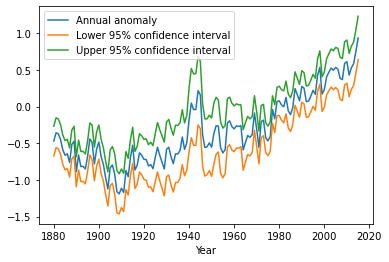

In [50]:
sst.plot()

In [47]:
#Set plotting formats
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [13.0, 6.0]
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth'] = 2.0

<AxesSubplot:xlabel='Year'>

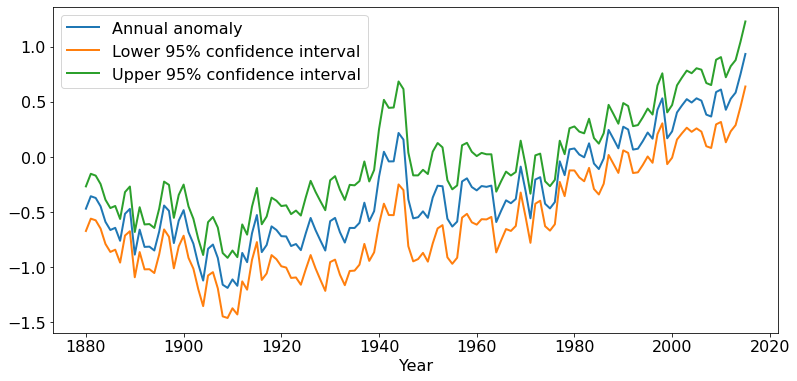

In [52]:
sst.plot()

1850 is usually considered the beginning of the industrial revolution, so before human affected climate by burning fossil fuels (but we did major land use changes and had impacts on many species' extinctions)

There is a definate trend in the data, with a big excursion in the 1940s

Let's ask some research questions. We will start these in lecture and you will finish them in lab:
- What is the trend in this data, that is how fast is SST increasing with time? 
- If we choose a different window for the trend analysis, how does this affect the answer?
- What causes all the interannual variablilty? If we detrend the data how does it look? Can we compare this with climate variabiltiy indices?
- What happened in the 1940s?

see: https://www.newscientist.com/article/dn11639-climate-myths-the-cooling-after-1940-shows-co2-does-not-cause-warming/

I am much more comfortable doing data analysis in xarray so I'm converting the pandas dataframe to an xarray dataset

In [35]:
import xarray as xr

In [36]:
sst_ds = sst.to_xarray()

In [37]:
sst_ds

<xarray.Dataset>
Dimensions:                        (Year: 136)
Coordinates:
  * Year                           (Year) int64 1880 1881 1882 ... 2014 2015
Data variables:
    Annual anomaly                 (Year) float64 -0.47 -0.3569 ... 0.9356
    Lower 95% confidence interval  (Year) float64 -0.6726 -0.5606 ... 0.6401
    Upper 95% confidence interval  (Year) float64 -0.2674 -0.1532 ... 1.231

If we want, we can add a pandas date range to this timeseries and use this for plotting. Not super needed here because it's annual, but would be useful if it was monthly or daily.

In [38]:
ssha_dates = pd.date_range(start = '1880', end = '2015', freq='Y')

In [39]:
ssha_dates

DatetimeIndex(['1880-12-31', '1881-12-31', '1882-12-31', '1883-12-31',
               '1884-12-31', '1885-12-31', '1886-12-31', '1887-12-31',
               '1888-12-31', '1889-12-31',
               ...
               '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31',
               '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31',
               '2013-12-31', '2014-12-31'],
              dtype='datetime64[ns]', length=135, freq='A-DEC')

In [40]:
# let's just work with the annual anomaly

sst_ds["Annual anomaly"] # note a lot of the syntax in xarray is similar to pandas

<xarray.DataArray 'Annual anomaly' (Year: 136)>
array([-0.4700088, -0.3568788, -0.3726612, -0.448443 , -0.5897538,
       -0.6636546, -0.6439392, -0.7616232, -0.5166342, -0.4717926,
       -0.8875836, -0.6603264, -0.8173098, -0.8148276, -0.84978  ,
       -0.6772536, -0.4412844, -0.4894326, -0.78255  , -0.578736 ,
       -0.4833054, -0.6831072, -0.7883226, -0.9732618, -1.123038 ,
       -0.8347986, -0.795843 , -0.917685 , -1.160703 , -1.189773 ,
       -1.112769 , -1.1706066, -0.8718498, -0.9557658, -0.6931926,
       -0.5274864, -0.8644752, -0.7996338, -0.6306858, -0.6633414,
       -0.7196544, -0.7222464, -0.8093034, -0.7910208, -0.8465382,
       -0.6946722, -0.554238 , -0.6640884, -0.7589772, -0.8502282,
       -0.5835816, -0.5537106, -0.683568 , -0.7777674, -0.6447312,
       -0.6452784, -0.5988258, -0.4155462, -0.5834772, -0.4924098,
       -0.1797678,  0.0471582, -0.0406296, -0.039807 ,  0.2180826,
        0.157752 , -0.3853548, -0.5579568, -0.5477346, -0.4941792,
       -0.5531796, -0.368496 , -0.2612952, -0.2661372, -0.5613282,
       -0.632412 , -0.5871312, -0.2226618, -0.1943208, -0.2735424,
       -0.3035772, -0.2642508, -0.2717028, -0.260397 , -0.5913306,
       -0.489249 , -0.39411  , -0.4203576, -0.38187  , -0.0876366,
       -0.3086334, -0.5571756, -0.2051676, -0.1836738, -0.4251924,
       -0.4675428, -0.4096278, -0.0397692, -0.165393 ,  0.0692586,
        0.0771966,  0.0219924, -0.0032202,  0.1239354, -0.0596304,
       -0.109917 , -0.0137916,  0.2456388,  0.1634436,  0.0785898,
        0.274842 ,  0.2497932,  0.0669942,  0.0748224,  0.1436454,
        0.2219328,  0.1661922,  0.428193 ,  0.5327244,  0.1698606,
        0.2325024,  0.4042188,  0.4671414,  0.5250798,  0.4946364,
        0.5327874,  0.5114556,  0.3846042,  0.3673116,  0.5894424,
        0.6127182,  0.4286736,  0.528696 ,  0.5846742,  0.7512552,
        0.935577 ])
Coordinates:
  * Year     (Year) int64 1880 1881 1882 1883 1884 ... 2011 2012 2013 2014 2015

#### Let's do a linear fit of the whole timeseries

In [41]:
from scipy import stats

In [42]:
# the syntax for this function is x,y, so time, ssta
ssta_trend_entire = stats.linregress(sst_ds.Year, sst_ds["Annual anomaly"])

In [43]:
ssta_trend_entire

LinregressResult(slope=0.010013503267496782, intercept=-19.822035179626454, rvalue=0.8362694544139663, pvalue=8.796275453011977e-37, stderr=0.0005671794277975704)

In [44]:
ssta_trend_entire.slope

0.010013503267496782

The value I am interested in is the slope, what is this? What are the units?

Let's plot the line to see the fit. The equation is y = mx + b, where m is the slope and b is the intercept, what are x and y in this case?

slope will be the rate at which temperature is increasing 

units : degrees F/year

In [45]:
import matplotlib.pyplot as plt 

Text(0, 0.5, 'SSTA $\\degree$F)')

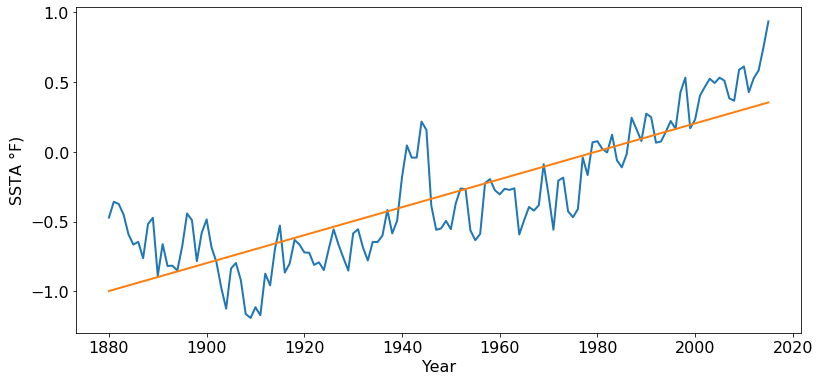

In [48]:
#Plot linear fit of sst
plt.plot(sst_ds.Year, sst_ds["Annual anomaly"])
plt.plot(sst_ds.Year, ssta_trend_entire.slope*sst_ds.Year + ssta_trend_entire.intercept)
plt.xlabel("Year")
plt.ylabel("SSTA $\degree$F)")

How good of a fit is this for the last few decades?

#### Let's do a linear fit for the last few decades and see what we get.

How do we access the later data?

In [50]:
#subset for years from 1980 onwards
sst_ds["Annual anomaly"][100:]

<xarray.DataArray 'Annual anomaly' (Year: 36)>
array([ 0.0771966,  0.0219924, -0.0032202,  0.1239354, -0.0596304,
       -0.109917 , -0.0137916,  0.2456388,  0.1634436,  0.0785898,
        0.274842 ,  0.2497932,  0.0669942,  0.0748224,  0.1436454,
        0.2219328,  0.1661922,  0.428193 ,  0.5327244,  0.1698606,
        0.2325024,  0.4042188,  0.4671414,  0.5250798,  0.4946364,
        0.5327874,  0.5114556,  0.3846042,  0.3673116,  0.5894424,
        0.6127182,  0.4286736,  0.528696 ,  0.5846742,  0.7512552,
        0.935577 ])
Coordinates:
  * Year     (Year) int64 1980 1981 1982 1983 1984 ... 2011 2012 2013 2014 2015

In [51]:
#linear fit for later years 
ssta_trend_1980_on = stats.linregress(sst_ds.Year[100:], sst_ds["Annual anomaly"][100:])

In [52]:
ssta_trend_1980_on.slope

0.02071126030888031

Text(0, 0.5, 'SSTA ($\\degree$F)')

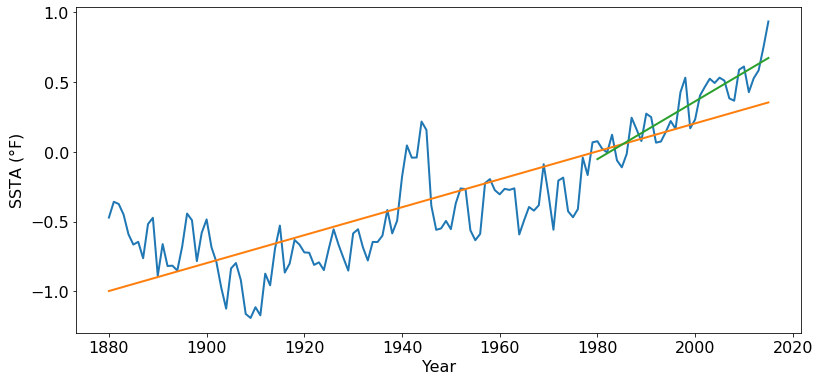

In [53]:
plt.plot(sst_ds.Year, sst_ds["Annual anomaly"])
plt.plot(sst_ds.Year, ssta_trend_entire.slope*sst_ds.Year + ssta_trend_entire.intercept)
plt.plot(sst_ds.Year[100:], ssta_trend_1980_on.slope*sst_ds.Year[100:] + ssta_trend_1980_on.intercept)
plt.xlabel('Year')
plt.ylabel('SSTA ($\degree$F)')

#### Detrending the data
Let's say we were interested in the variability outside of the trend. How do we detrend the data?

In [54]:
trend_entire = ssta_trend_entire.slope*sst_ds.Year + ssta_trend_entire.intercept

In [57]:
sst_detrended = sst_ds["Annual anomaly"] - trend_entire
#subtracting trend ( our y = mx+b equation) from the data ?

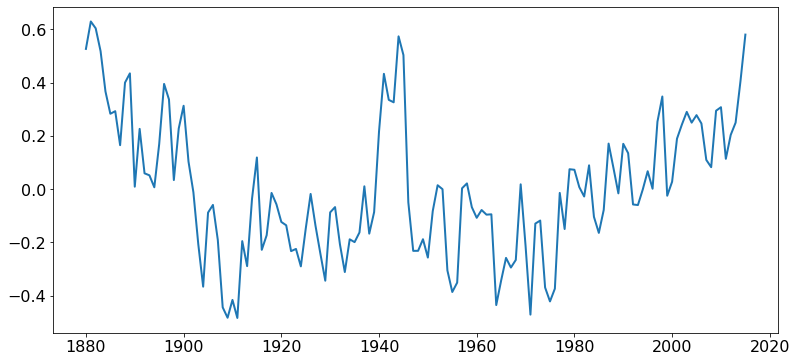

In [58]:
plt.plot(sst_ds.Year, sst_detrended)

#### Creating a moving average, i.e. filtering or smoothing.
Let's say we wanted to smooth the data to remove some of the variability, how would we do this?

In [59]:
import numpy as np 

In [60]:
sst_ds["Annual anomaly"].shape

(136,)

In [62]:
#initialize array 

ssta_filtered = np.zeros(136)

for i in range(134):
    ssta_filtered[i+1]=(sst_ds["Annual anomaly"][i] + sst_ds["Annual anomaly"]
                        [i+1] + sst_ds["Annual anomaly"][i+2])/3

In [108]:
ssta_filtered

array([ 0.       , -0.3998496, -0.392661 , -0.470286 , -0.5672838,
       -0.6324492, -0.689739 , -0.6407322, -0.58335  , -0.6253368,
       -0.6732342, -0.7884066, -0.7641546, -0.8273058, -0.7806204,
       -0.656106 , -0.5359902, -0.571089 , -0.6169062, -0.6148638,
       -0.5817162, -0.6515784, -0.8148972, -0.9615408, -0.9770328,
       -0.9178932, -0.8494422, -0.958077 , -1.089387 , -1.154415 ,
       -1.1577162, -1.0517418, -0.9994074, -0.8402694, -0.7254816,
       -0.6950514, -0.7305318, -0.7649316, -0.697887 , -0.6712272,
       -0.7017474, -0.7504014, -0.7741902, -0.8156208, -0.7774104,
       -0.6984828, -0.6376662, -0.6591012, -0.7577646, -0.730929 ,
       -0.6625068, -0.6069534, -0.671682 , -0.7020222, -0.689259 ,
       -0.6296118, -0.5532168, -0.5326164, -0.4971444, -0.4185516,
       -0.2083398, -0.0577464, -0.0110928,  0.045882 ,  0.1120092,
       -0.0031734, -0.2618532, -0.4970154, -0.5332902, -0.5316978,
       -0.4719516, -0.3943236, -0.2986428, -0.3629202, -0.4866

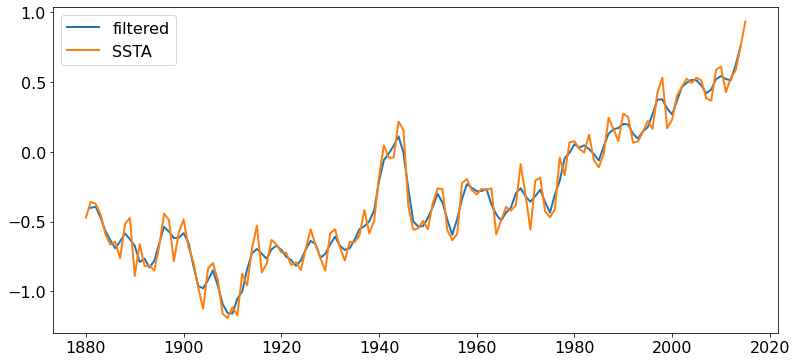

In [63]:
plt.plot(sst_ds.Year[1:-1],ssta_filtered[1:-1], label = "filtered")
plt.plot(sst_ds.Year,sst_ds["Annual anomaly"], label = 'SSTA')
plt.legend()


# Lab 12.2

**E.1** Define a datetime object that is your birthday. Increment this date using timedelta by a) ten weeks, b) five minutes, c) two years (tricky!) Hint: see help(timedelta)

In [134]:
#defining my birthday 
bday = datetime(1999,8,24)
print(bday)

1999-08-24 00:00:00


In [135]:
#increment by ten weeks 
bday1 = bday + timedelta(weeks = 10)
print(bday1)

1999-11-02 00:00:00


In [138]:
#increment by 5 minutes
bday2 = bday + timedelta(minutes = 5)
print(bday2)

1999-08-24 00:05:00


In [140]:
timedelta?

In [142]:
#increment by two years 
bday3 = bday + timedelta(weeks = 104)# no argument for years, use weeks instead
print(bday3)

2001-08-21 00:00:00


**E.2** Define a daterange for your birthday every year of your life

In [214]:
#daterange for birthdays 
#set frequency to annually, at the start of August 
#then offset days to make it the 24th day of August 
bday_daterange = pd.date_range( start="8/24/1999",end = "8/24/2022", freq = "AS-AUG")+ pd.DateOffset(days=23)

In [215]:
bday_daterange

DatetimeIndex(['2000-08-24', '2001-08-24', '2002-08-24', '2003-08-24',
               '2004-08-24', '2005-08-24', '2006-08-24', '2007-08-24',
               '2008-08-24', '2009-08-24', '2010-08-24', '2011-08-24',
               '2012-08-24', '2013-08-24', '2014-08-24', '2015-08-24',
               '2016-08-24', '2017-08-24', '2018-08-24', '2019-08-24',
               '2020-08-24', '2021-08-24', '2022-08-24'],
              dtype='datetime64[ns]', freq=None)

**E.3** Print all your birthdays out as month, day, year (no minutes, etc)

In [219]:
bday_daterange = bday_daterange.strftime("%m/%d/%Y")

In [220]:
print(bday_daterange)

Index(['08/24/2000', '08/24/2001', '08/24/2002', '08/24/2003', '08/24/2004',
       '08/24/2005', '08/24/2006', '08/24/2007', '08/24/2008', '08/24/2009',
       '08/24/2010', '08/24/2011', '08/24/2012', '08/24/2013', '08/24/2014',
       '08/24/2015', '08/24/2016', '08/24/2017', '08/24/2018', '08/24/2019',
       '08/24/2020', '08/24/2021', '08/24/2022'],
      dtype='object')


**E.4** Go through the tutorial on datetimes in pandas here: https://towardsdatascience.com/working-with-datetime-in-pandas-dataframe-663f7af6c587 Type in all the examples here in the lab.

1. Convert strings to datetime 

In [221]:
df = pd.DataFrame({"date": ["3/10/2000", "3/11/2000", "3/12/2000"],
                   "value": [2, 3, 4]})
df["date"]=pd.to_datetime(df["date"])
df

,date,value
0,2000-03-10,2
1,2000-03-11,3
2,2000-03-12,4


2. Assemble a datatime from multiplle columns

In [227]:
df = pd.DataFrame({"year":[2015,2016],
                  "month":[2,3],
                  "day":[4,5]})

df["date"]=pd.to_datetime(df)
df

,year,month,day,date
0,2015,2,4,2015-02-04
1,2016,3,5,2016-03-05


3. Get year month and day 

In [228]:
df = pd.DataFrame({'name': ['Tom', 'Andy', 'Lucas'],
                 'DoB': ['08-05-1997', '04-28-1996', '12-16-1995']})
df['DoB'] = pd.to_datetime(df['DoB'])

In [229]:
#get year month and day 
df["year"]=df["DoB"].dt.year
df["month"]=df["DoB"].dt.month
df["day"]=df["DoB"].dt.day
df

,name,DoB,year,month,day
0,Tom,1997-08-05,1997,8,5
1,Andy,1996-04-28,1996,4,28
2,Lucas,1995-12-16,1995,12,16


4. Get the week of the year, the day of the week, and leap year

In [254]:
df["week_of_year"]=df["DoB"].dt.week
df["day_of_week"]=df["DoB"].dt.dayofweek
df["is_leap_year"]=df["DoB"].dt.is_leap_year
df

<ipython-input-254-5d79200e2423>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["week_of_year"]=df["DoB"].dt.week


,name,DoB,year,month,day,week of year,day of week,is_leap_year,week_of_year,day_of_week,day_of_week_name,age
0,Tom,1997-08-05,1997,8,5,32,1,False,32,1,Tuesday,23
1,Andy,1996-04-28,1996,4,28,17,6,True,17,6,Sunday,24
2,Lucas,1995-12-16,1995,12,16,50,5,False,50,5,Saturday,25


In [235]:
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'}

df["day_of_week_name"]=df["DoB"].dt.weekday.map(dw_mapping)
df

,name,DoB,year,month,day,week of year,day of week,is_leap_year,week_of_year,day_of_week,day_of_week_name
0,Tom,1997-08-05,1997,8,5,32,1,False,32,1,Tuesday
1,Andy,1996-04-28,1996,4,28,17,6,True,17,6,Sunday
2,Lucas,1995-12-16,1995,12,16,50,5,False,50,5,Saturday


5. Get the age from date of birth 

In [236]:
today = pd.to_datetime("today")
diff_y = today.year - df["DoB"].dt.year

b_md = df["DoB"].apply(lambda x: (x.month,x.day))
no_birthday = b_md > (today.month, today.day)

df["age"]=diff_y - no_birthday
df

,name,DoB,year,month,day,week of year,day of week,is_leap_year,week_of_year,day_of_week,day_of_week_name,age
0,Tom,1997-08-05,1997,8,5,32,1,False,32,1,Tuesday,23
1,Andy,1996-04-28,1996,4,28,17,6,True,17,6,Sunday,24
2,Lucas,1995-12-16,1995,12,16,50,5,False,50,5,Saturday,25


6. Imporve performance by setting date column as the index

In [268]:
df = pd.read_csv("https://raw.githubusercontent.com/BindiChen/machine-learning/master/data-analysis/008-pandas-datetime/data/city_sales.csv", parse_dates =["date"])

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795144 entries, 0 to 1795143
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   num     int64         
 2   city    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 41.1+ MB


In [270]:
df = df.set_index(["date"])

In [271]:
df

,num,city
date,,
2015-01-01 09:00:00,4,London
2015-01-01 09:01:00,4,London
2015-01-01 09:02:00,3,London
2015-01-01 09:03:00,3,London
2015-01-01 09:04:00,3,London
...,...,...
2019-01-31 15:56:00,3,Cambridge
2019-01-31 15:57:00,3,Cambridge
2019-01-31 15:58:00,3,Cambridge


7. Select data with a specific year and perform aggregation

In [272]:
df.loc["2018"]

,num,city
date,,
2018-01-01 09:00:00,2,London
2018-01-01 09:01:00,1,London
2018-01-01 09:02:00,3,London
2018-01-01 09:03:00,3,London
2018-01-01 09:04:00,3,London
...,...,...
2018-12-31 15:56:00,4,Cambridge
2018-12-31 15:57:00,2,Cambridge
2018-12-31 15:58:00,3,Cambridge


In [273]:
df.loc["2018","num"].sum()

1231190

In [274]:
df.groupby("city").sum()

,num
city,
Cambridge,1257405
Durham,1257530
London,1256979
Oxford,1257188


8. Select data with a specific month or a specific day of the month 

In [275]:
df.loc["2018-5"]

,num,city
date,,
2018-05-01 09:00:00,1,London
2018-05-01 09:01:00,4,London
2018-05-01 09:02:00,3,London
2018-05-01 09:03:00,2,London
2018-05-01 09:04:00,3,London
...,...,...
2018-05-31 15:56:00,3,Cambridge
2018-05-31 15:57:00,4,Cambridge
2018-05-31 15:58:00,2,Cambridge


In [276]:
df.loc["2018-5-1"]

,num,city
date,,
2018-05-01 09:00:00,1,London
2018-05-01 09:01:00,4,London
2018-05-01 09:02:00,3,London
2018-05-01 09:03:00,2,London
2018-05-01 09:04:00,3,London
...,...,...
2018-05-01 15:56:00,2,Cambridge
2018-05-01 15:57:00,3,Cambridge
2018-05-01 15:58:00,3,Cambridge


In [277]:
cond = df.index.month==2
df[cond]

,num,city
date,,
2015-02-02 09:00:00,4,London
2015-02-02 09:01:00,3,London
2015-02-02 09:02:00,3,London
2015-02-02 09:03:00,2,London
2015-02-02 09:04:00,1,London
...,...,...
2018-02-28 15:56:00,4,Cambridge
2018-02-28 15:57:00,3,Cambridge
2018-02-28 15:58:00,4,Cambridge


9. Select data between two dates

In [278]:
df.loc["2016":"2018"]

,num,city
date,,
2016-01-01 09:00:00,4,London
2016-01-01 09:01:00,3,London
2016-01-01 09:02:00,4,London
2016-01-01 09:03:00,4,London
2016-01-01 09:04:00,2,London
...,...,...
2018-12-31 15:56:00,4,Cambridge
2018-12-31 15:57:00,2,Cambridge
2018-12-31 15:58:00,3,Cambridge


In [279]:
df.loc["2018-5-2 10":"2018-5-2 11"]

,num,city
date,,
2018-05-02 10:00:00,2,London
2018-05-02 10:01:00,3,London
2018-05-02 10:02:00,4,London
2018-05-02 10:03:00,4,London
2018-05-02 10:04:00,4,London
...,...,...
2018-05-02 11:55:00,3,Cambridge
2018-05-02 11:56:00,3,Cambridge
2018-05-02 11:57:00,4,Cambridge


In [281]:
df.loc["2018-5-2 10:30":"2018-5-2 10:45"]

,num,city
date,,
2018-05-02 10:30:00,3,London
2018-05-02 10:31:00,3,London
2018-05-02 10:32:00,1,London
2018-05-02 10:33:00,3,London
2018-05-02 10:34:00,3,London
...,...,...
2018-05-02 10:41:00,3,Cambridge
2018-05-02 10:42:00,3,Cambridge
2018-05-02 10:43:00,3,Cambridge


In [283]:
df.between_time("10:30","10:45")

,num,city
date,,
2015-01-01 10:30:00,4,London
2015-01-01 10:31:00,3,London
2015-01-01 10:32:00,3,London
2015-01-01 10:33:00,3,London
2015-01-01 10:34:00,4,London
...,...,...
2019-01-31 10:41:00,3,Cambridge
2019-01-31 10:42:00,3,Cambridge
2019-01-31 10:43:00,1,Cambridge


10. Handle missing values 

In [285]:
df["rolling_sum"]=df.rolling(3).sum()
df.head()

,num,city,rolling_sum
date,,,
2015-01-01 09:00:00,4,London,NaN
2015-01-01 09:01:00,4,London,NaN
2015-01-01 09:02:00,3,London,11.0
2015-01-01 09:03:00,3,London,10.0
2015-01-01 09:04:00,3,London,9.0


In [286]:
df["rolling_sum_backfilled"]= df["rolling_sum"].fillna(method = "backfill")
df.head()

,num,city,rolling_sum,rolling_sum_backfilled
date,,,,
2015-01-01 09:00:00,4,London,NaN,11.0
2015-01-01 09:01:00,4,London,NaN,11.0
2015-01-01 09:02:00,3,London,11.0,11.0
2015-01-01 09:03:00,3,London,10.0,10.0
2015-01-01 09:04:00,3,London,9.0,9.0


**E.5** Do a linear fit of the SSTA data from 1940 to 1970. What trend do you get? How confident are you in this result? How does it compare to the trends we did in lecture (use quantitative data to explain).

In [65]:
#subset for 1940-1970
sst_ds["Annual anomaly"][60:91]

<xarray.DataArray 'Annual anomaly' (Year: 31)>
array([-0.1797678,  0.0471582, -0.0406296, -0.039807 ,  0.2180826,
        0.157752 , -0.3853548, -0.5579568, -0.5477346, -0.4941792,
       -0.5531796, -0.368496 , -0.2612952, -0.2661372, -0.5613282,
       -0.632412 , -0.5871312, -0.2226618, -0.1943208, -0.2735424,
       -0.3035772, -0.2642508, -0.2717028, -0.260397 , -0.5913306,
       -0.489249 , -0.39411  , -0.4203576, -0.38187  , -0.0876366,
       -0.3086334])
Coordinates:
  * Year     (Year) int64 1940 1941 1942 1943 1944 ... 1966 1967 1968 1969 1970

In [66]:
#linear regression for 1940-70
sst_1940_70 = stats.linregress(sst_ds.Year[60:91], sst_ds["Annual anomaly"][60:91])

In [67]:
sst_1940_70

LinregressResult(slope=-0.008184913548387096, intercept=15.69453642580645, rvalue=-0.33625811590031707, pvalue=0.06437970871891731, stderr=0.00425683789714022)

In [68]:
sst_1940_70.slope

-0.008184913548387096

Text(0, 0.5, 'SSTA ($\\degree$F)')

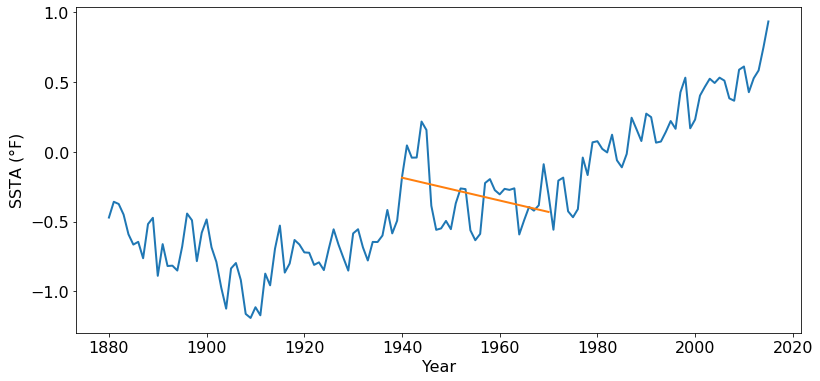

In [70]:
plt.plot(sst_ds.Year, sst_ds["Annual anomaly"])
plt.plot(sst_ds.Year[60:91], sst_1940_70.slope*sst_ds.Year[60:91]+sst_1940_70.intercept)
plt.xlabel('Year')
plt.ylabel('SSTA ($\degree$F)')

Using a linear regression from 1940 to 1970, there appears to be a decrease in sea surface temperature during this period

**E.6** According to the internet, what might have caused this decline in SST during this perioud? Write a few sentances explaining this and cite your sources here.

    The decrease in global sea surface temperature might be attributed to a period of high amounts of aerosols in the atmoshpere. Aerosols, such as soot and sulfates, are also products of fossil fuel burning and industrialization. Aerosols block the amount of sunlight reaching the surface, which could reduce global temperatures. Aerosol emissions peaked in 1970s. 
    
Source: https://earthobservatory.nasa.gov/features/GISSTemperature/giss_temperature4.php

**E.7** Detrend from 1970 on and plot your result. Compare this to an ENSO (El Nino) index and speculate on what may have caused this interannual variability. How does ENSO affect SST and why?

In [90]:
sst_ds.Year[-1]

<xarray.DataArray 'Year' ()>
array(2015, dtype=int64)
Coordinates:
    Year     int64 2015

In [71]:
#linear regression for 1970 on 
sst_1970_on = stats.linregress(sst_ds.Year[90:], sst_ds["Annual anomaly"][90:])

In [72]:
sst_1970_on

LinregressResult(slope=0.0231983908973173, intercept=-46.03777006290472, rvalue=0.9220490019048976, pvalue=9.424068042507898e-20, stderr=0.0014681505420044156)

In [74]:
#1970and on linear equation 
trend_1970_on = sst_1970_on.slope*sst_ds.Year[90:]+sst_1970_on.intercept 

In [75]:
#detrend 
detrend_1970_on = sst_ds["Annual anomaly"]-trend_1970_on

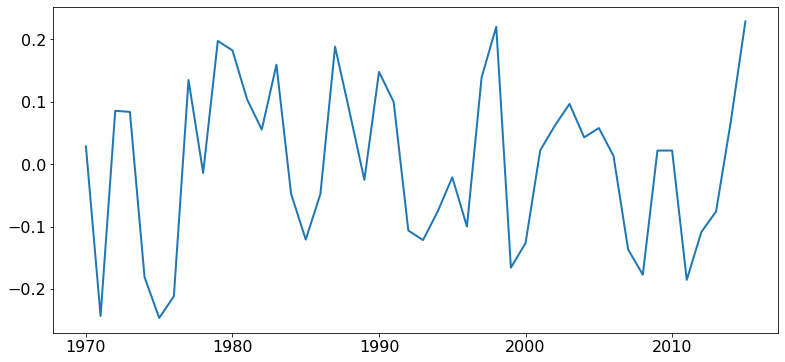

In [263]:
#plot detrended data from 1970 and on 
plt.plot(sst_ds.Year[90:],detrend_1970_on)


Comparing this data to an ENSO index, we can see that there are similar patterns in fluctuations. Negative values in this detrended graph occur during cooling periods, while positive values in our graph depict warm periods. 

**E.8** (Advanced) Perform a five year moving average of your detrended data from E.7. Explain your result in relation to the periodicity of ENSO.

#pseudo code

start with year 3

for all the years:
    avg = (y1 + y2 + y3 + y4 + y5)/5
    
for year i in years:
    avg = (y(i-2) + y(i-1) + y(i) + y(i+1) + y(i+2))/5
    emptyarray = emptyarray.append(avg)

In [116]:
#5 year average 

avg5yr = np.zeros(46) #empty array

for i in range(44):
    avg5yr[i+2] = (detrend_1970_on[i-2]+detrend_1970_on[i-1]+detrend_1970_on[i+1]+detrend_1970_on[i+2])/5

In [118]:
avg5yr.shape

(46,)

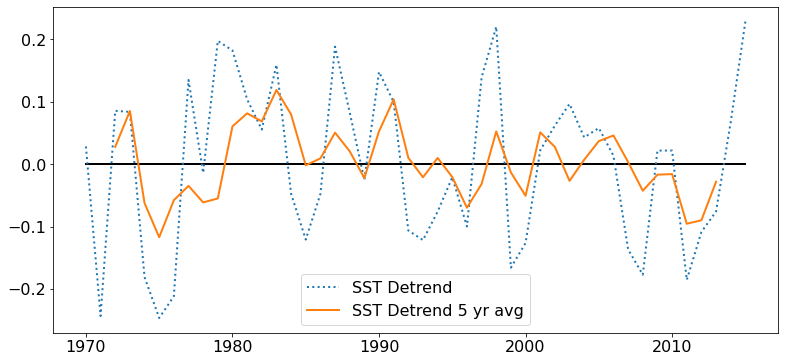

In [262]:
plt.plot([1970,2015],[0,0], c ="k")
plt.plot(sst_ds.Year[90:],detrend_1970_on, label = "SST Detrend", linestyle =":")
plt.plot(sst_ds.Year[92:-2],avg5yr[2:-2] , label = "SST Detrend 5 yr avg")
plt.legend()

Our 5 year moving average of detrended data has much less variability than the annual average one from E7. This 5 year average shows that there generally is more warming periods than cooling periods, are there are more positive peaks than negative peaks. The period of these warming and cooling periods does not appear to be constant, but they seem to have periods of between 3 and 7 years. 